In [1]:
# !pip install frc3223-azurite


In [2]:
from frc3223_azurite import motors
from frc3223_azurite.conversions import *
import numpy
from driven2 import DriveSim
from matplotlib import pyplot as plt
from pidcontroller import NoThreadingPIDController as PIDController
from profiler import TrapezoidalProfile
from wpilib import LinearDigitalFilter

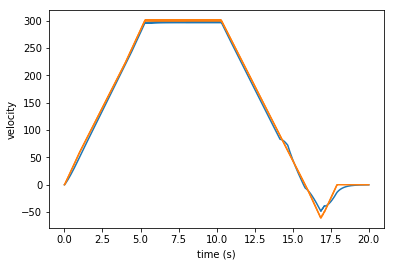

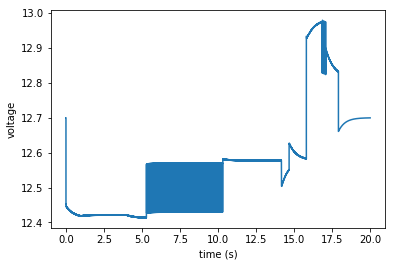

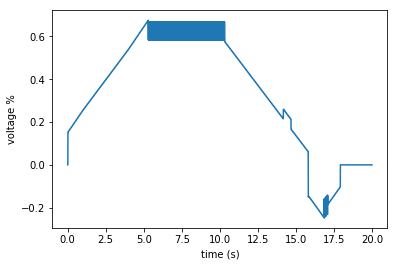

In [22]:
Ks=1.320812
Kv=0.013736 
Ka=0.005938
Kv = Kv / 100. * 157.5 # 1 s/100 ms, 1 rad/157.5 encoder ticks => V*s/rad
Ka = Ka / 100. * 157.5 # ditto, => V*s^2/rad
DT = 0.01

def voltage_p_for_va(v, a, current_voltage):
    
    if current_voltage == 0: return 0
    required_voltage = Ks * numpy.sign(v) + Ka * a + Kv * v
    return required_voltage / current_voltage
    

def init(state):
    state.profiler = TrapezoidalProfile(cruise_v=300, a=60, target_pos=3000, tolerance=20)
    state.vp0 = 0
    def source():
        return state.velocity_radps
    def output(voltage_p):
        state.profiler.calculate_new_velocity(state.position_rad, DT)
        state.goal_velocity_radps = state.profiler.current_target_v
        state.pid.setSetpoint(state.goal_velocity_radps)
        a= state.profiler.current_a
        v=state.profiler.current_target_v
        state.vp0 = voltage_p_for_va(v, a, state.available_voltage)
        state._voltage_p = voltage_p + state.vp0
    state.pid = PIDController(Kp=0.0000, Ki=0, Kd=0.0, Kf=0, source=source, output=output, period=DT)
    state.pid.pidInput.getPIDSourceType = lambda: state.pid.PIDSourceType.kRate
    state.pid.enable()
    state.pid.setSetpoint(state.goal_velocity_radps) # m/s
def periodic(state):
    
    #state._voltage_p = voltage_p_for_va(v, a, state.available_voltage)
    state.pid._calculate()
#     if state.time_from_start_s > 2 and state.pid.getSetpoint() == 3:
#         state.pid.setSetpoint(4)
    
sim1 = DriveSim(
    ks=Ks,
    kv=Kv,
    ka=Ka,
    dt_s=0.001,
    battery_resistance_ohms=0.01,
    fuse_resistance_ohms=0.01,
    init=init,
    periodic=periodic,
    periodic_period=DT,
    gearbox_count=2,
    gearbox=motors.MotorSystem(motor=motors.cim, motor_count=2, gearing_ratio=10.75))

sim1.run_sim(timeout_s=20)
m2ft = numpy.vectorize(meter_to_feet)


plt.plot(sim1.ts, (sim1.vrots))
plt.plot(sim1.ts, (sim1.goal_vrots))
plt.xlabel("time (s)")
plt.ylabel("velocity")
#plt.xlim(-.01, .05)
plt.show()


plt.plot(sim1.ts, (sim1.bus_voltages))
plt.xlabel("time (s)")
plt.ylabel("voltage")
#plt.xlim(-.01, .05)
plt.show()

plt.plot(sim1.ts, (sim1.voltage_ps))
plt.xlabel("time (s)")
plt.ylabel("voltage %")
#plt.ylim(-0.2, 1.2)
#plt.xlim(-.01, .05)
plt.show()

In [4]:
for v, t in zip(sim2.voltages, sim2.ts):
    print (v, t)
    if t > 1000: break


NameError: name 'sim2' is not defined

In [ ]:
12. * 0.006708  / 0.428

In [ ]:
Ks

In [ ]:
(12.7 - 1.32) / Kv

In [ ]:
Kv

In [ ]:
526 / 10.75